# Question 2
*Amir Hossein Mansoori - 99243069*

Import required modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset:

In [2]:
laliga_matches = pd.read_csv('LaLiga_Matches_1995-2021.csv')

Get all the seasons:

In [3]:
seasons = laliga_matches['Season'].unique()
seasons.sort()

Calculate the rank of Real Madrid in each season. For this, we first calculate points and goal differences of each team, then sort first by score and the by goal difference. After checking for cases where top 2 teams have equal points, we find where Real Madrid stands and then save the ranking in a list so we can later plot those rankings:

In [4]:
real_madrid_ranks = []
for season in seasons:
    standings = {}
    matches_in_current_season = laliga_matches.loc[laliga_matches['Season'] == season]
    
    for index, row in matches_in_current_season.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_team_goals = row['FTHG']
        away_team_goals = row['FTAG']
        result = row['FTR']
        
        if home_team not in standings:
            standings[home_team] = {
                'score': 0,
                'goal_diff': 0
            }
        if away_team not in standings:
            standings[away_team] = {
                'score': 0,
                'goal_diff': 0
            }
        
        standings[home_team]['goal_diff'] += (home_team_goals - away_team_goals)
        standings[away_team]['goal_diff'] += (away_team_goals - home_team_goals)
        
        if result == 'H':
            standings[home_team]['score'] += 3
        elif result == 'A':
            standings[away_team]['score'] += 3
        elif result == 'D':
            standings[home_team]['score'] += 1
            standings[away_team]['score'] += 1
        
    standings_df = pd.DataFrame.from_dict(standings, orient='index')
    standings_df.sort_values(['score', 'goal_diff'], ascending=False, inplace=True)
    
    first_team_score = standings_df.iloc[0]['score']
    first_team_goal_diff = standings_df.iloc[0]['goal_diff'] 
    first_team = standings_df.index[0]
    second_team_score = standings_df.iloc[1]['score']
    second_team_goal_diff = standings_df.iloc[1]['goal_diff']
    second_team = standings_df.index[1]
    real_madrid_rank = standings_df.index.get_loc('Real Madrid') + 1
    
    if real_madrid_rank > 2 or first_team_score != second_team_score:
        real_madrid_ranks.append(real_madrid_rank)
    else:
        result_1v2 = matches_in_current_season.loc[(matches_in_current_season['HomeTeam'] == first_team) & (matches_in_current_season['AwayTeam'] == second_team)].iloc[0]['FTR']
        result_2v1 = matches_in_current_season.loc[(matches_in_current_season['HomeTeam'] == second_team) & (matches_in_current_season['AwayTeam'] == first_team)].iloc[0]['FTR']
        
        if result_1v2 == 'H' and result_2v1 in ['A', 'D']:
            # team1 is the winner
            real_madrid_ranks.append(1 if first_team == 'Real Madrid' else 2)
        elif result_2v1 == 'H' and result_1v2 in ['A', 'D']:
            # team2 is the winner
            real_madrid_ranks.append(1 if second_team == 'Real Madrid' else 2)
        else:
            # use goal difference
            if first_team_goal_diff >= second_team_goal_diff:
                # team1 is winner
                real_madrid_ranks.append(1 if first_team == 'Real Madrid' else 2)
            else:
                # team2 is winner
                real_madrid_ranks.append(1 if second_team == 'Real Madrid' else 2)

Finally, plot the result:

[6, 1, 4, 2, 5, 1, 3, 1, 4, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 2]


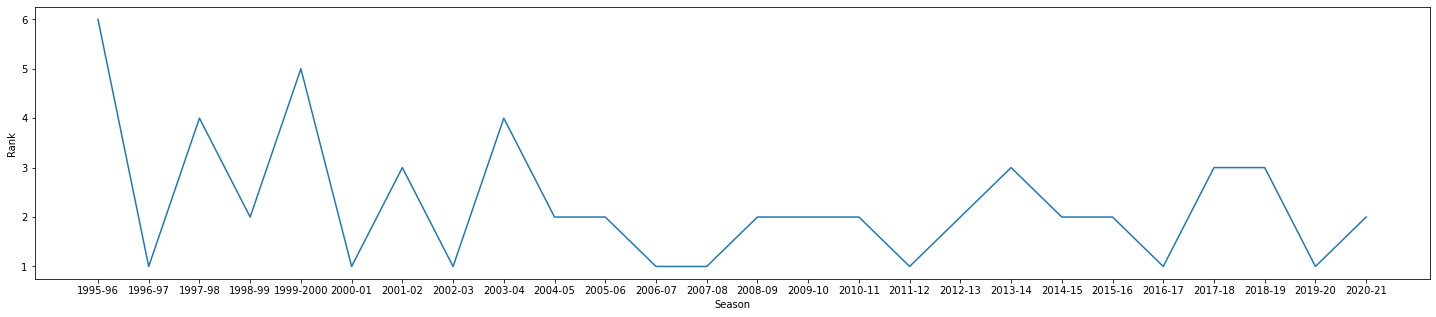

In [5]:
print(real_madrid_ranks)
plt.figure(figsize = (25, 5))
plt.plot(seasons, real_madrid_ranks)
plt.xlabel('Season')
plt.ylabel('Rank')
plt.show()